In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets import interact, FloatSlider, IntSlider, Button, Output 
display(HTML("<style>.rendered_html.text_cell_render {max-width:600px; }</style>")) 

# Agent paths

Resourses and useful links:

 - ...

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from nbx.fileio import load, dump, ls
from pathlib import Path

In [3]:
data_path = Path("data")
ls(data_path/"house_expo_json").files[:10]

['0004d52d1aeeb8ae6de39d6bd993e992.json',
 '0004dd3cb11e50530676f77b55262d38.json',
 '000514ade3bcc292a613a4c2755a5050.json',
 '00052c0562bde7790f8354e6123ae7ff.json',
 '000539881d82c92e43ff2e471a97fcf9.json',
 '0005b92a9ed6349df155a462947bfdfe.json',
 '00065ecbdd7300d35ef4328ffe871505.json',
 '000cf80f9ff74db95a46cd3a269a6e7c.json',
 '000d0395709d2a16e195c6f0189155c4.json',
 '000d939dc2257995adcb27483b04ad04.json']

0


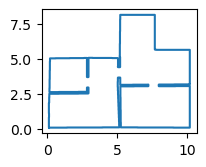

1


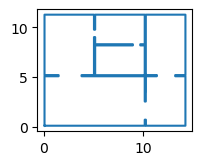

In [6]:
for i in range(0,2):
    env_name = ls(data_path/"house_expo_json").files[i]
    d = load(data_path/"house_expo_json"/env_name)
    print(i)
    verts = d['verts']
    verts.append(verts[0])

    plt.figure(figsize=(2,2))
    plt.gca().set_aspect(1)
    plt.plot(*np.array(d['verts']).T);
    plt.show()

dict_keys(['verts', 'id', 'room_category', 'room_num', 'bbox'])


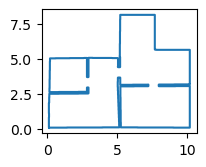

In [7]:
env_name = ls(data_path/"house_expo_json").files[0]
d = load(data_path/"house_expo_json"/env_name)
print(d.keys())

verts = d['verts']
verts.append(verts[0])

plt.figure(figsize=(2,2))
plt.gca().set_aspect(1)
plt.plot(*np.array(d['verts']).T);

# Construct a path interactively

In [9]:
# Not `%matplotlib inline`
%matplotlib tk 
# Code adapted from:
# https://stackoverflow.com/questions/25521120/store-mouse-click-event-coordinates-with-matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json

x = np.arange(-10,10)
y = x**2

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_aspect(1)

ax.plot(*np.array(d["verts"]).T)
scatter = ax.scatter([],[])
scatter.set_color(f"C1")

paths = [[]]
recording = True
c = 0

def onclick(event):
    x, y = event.xdata, event.ydata
    # print(f"x = {x}, y = {y}")

    global paths
    global fig, ax, c;
    
    if recording:
        paths[-1].append((x, y))
        scatter.set_offsets(np.array(paths[-1]))
        fig.canvas.draw()

def press(event):
    global recording, c;

    if event.key == "enter":
        print(f"#paths = #{len(paths)}...")
        if len(paths[-1]) > 0:
            paths.append([])
        
fig.canvas.mpl_connect("key_press_event", press)
fig.canvas.mpl_connect("button_press_event", onclick)

9

#paths = #1...
#paths = #2...
#paths = #3...
#paths = #4...
#paths = #5...
#paths = #6...


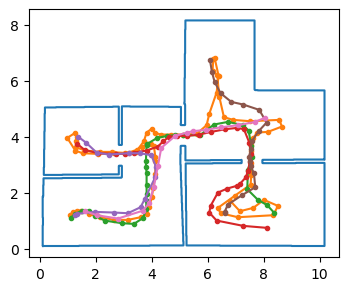

In [10]:
%matplotlib inline
plt.figure(figsize=(4,4))
plt.gca().set_aspect(1)
plt.plot(*np.array(d['verts']).T);
for path in paths:
    plt.plot(*np.array(path).T, marker=".")

In [11]:
fname = "path_data.json"
dump(dict(env_name=env_name, paths=paths, verts=verts), data_path/fname )